In [1]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Preparing traing and validtaion datasets

For Logistic Regression, data is split into two sets, validation and training sets.

In [2]:
# Reading the training dataset.
data_df = pd.read_csv('../data/train.csv')
data = data_df.values

# Spliting it into two separate datasets, validation and train.
np.random.seed(2)
inds = np.arange(data.shape[0])
np.random.shuffle(inds)
num_train = int(0.8 * data.shape[0])
train_inds = inds[:num_train]
val_inds = inds[num_train:]
trainset = data[train_inds] 
valset = data[val_inds]

# Normalzing the dataset using z-score.
mu = trainset[:, :-1].mean(axis=0)
sigma = trainset[:, :-1].std(axis=0)
trainset[:, :-1] = (trainset[:, :-1] - mu)/sigma
valset[:, :-1] = (valset[:, :-1] - mu)/sigma

# Extracing features and labels of each dataset.
train_X = trainset[:, :-1]
train_y = trainset[:, -1]

val_X = valset[:, :-1]
val_y = valset[:, -1]

In [3]:
# Checking statistics of all features in the dataset, such as count, mean, and std.
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,47760.0,2.387950e+04,1.378727e+04,0.000000e+00,1.193975e+04,2.387950e+04,3.581925e+04,4.775900e+04
lat,47760.0,-2.933507e+00,2.290675e+01,-3.109518e+01,-2.458279e+01,-3.872229e+00,2.176662e+01,2.405476e+01
lon,47760.0,2.692708e+02,4.104659e+01,2.290625e+02,2.418750e+02,2.531250e+02,2.771875e+02,3.543750e+02
TMQ,47760.0,3.483568e+01,1.286955e+01,6.960679e+00,2.403308e+01,3.489657e+01,4.472710e+01,8.064136e+01
U850,47760.0,-6.202928e-01,6.847307e+00,-5.880523e+01,-5.507042e+00,-1.671802e+00,3.621788e+00,3.227734e+01
V850,47760.0,1.040469e-02,4.332385e+00,-2.621691e+01,-2.307535e+00,1.571722e-01,2.341779e+00,5.806025e+01
UBOT,47760.0,-2.152124e+00,6.043284e+00,-5.826048e+01,-6.589128e+00,-2.687853e+00,1.720815e+00,3.021539e+01
VBOT,47760.0,-7.594555e-01,4.761139e+00,-2.076045e+01,-3.800056e+00,-7.749922e-01,2.072186e+00,3.110628e+01
QREFHT,47760.0,1.437782e-02,3.969209e-03,4.363584e-03,1.124537e-02,1.456635e-02,1.798656e-02,2.236619e-02
PS,47760.0,1.015541e+05,5.458636e+02,9.661160e+04,1.011521e+05,1.015280e+05,1.018875e+05,1.039970e+05


In [4]:
# Checking for Null values.
data_df.isnull().sum()

S.No      0
lat       0
lon       0
TMQ       0
U850      0
V850      0
UBOT      0
VBOT      0
QREFHT    0
PS        0
PSL       0
T200      0
T500      0
PRECT     0
TS        0
TREFHT    0
Z1000     0
Z200      0
ZBOT      0
time      0
LABELS    0
dtype: int64

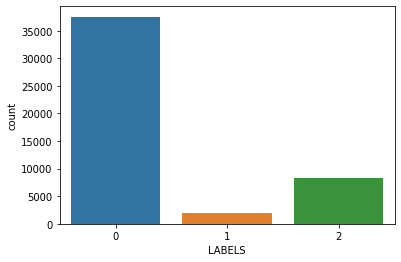

In [5]:
# Plotting count-plot to see if the dataset is balanced or not.
ax = sns.countplot(x="LABELS", data=data_df)

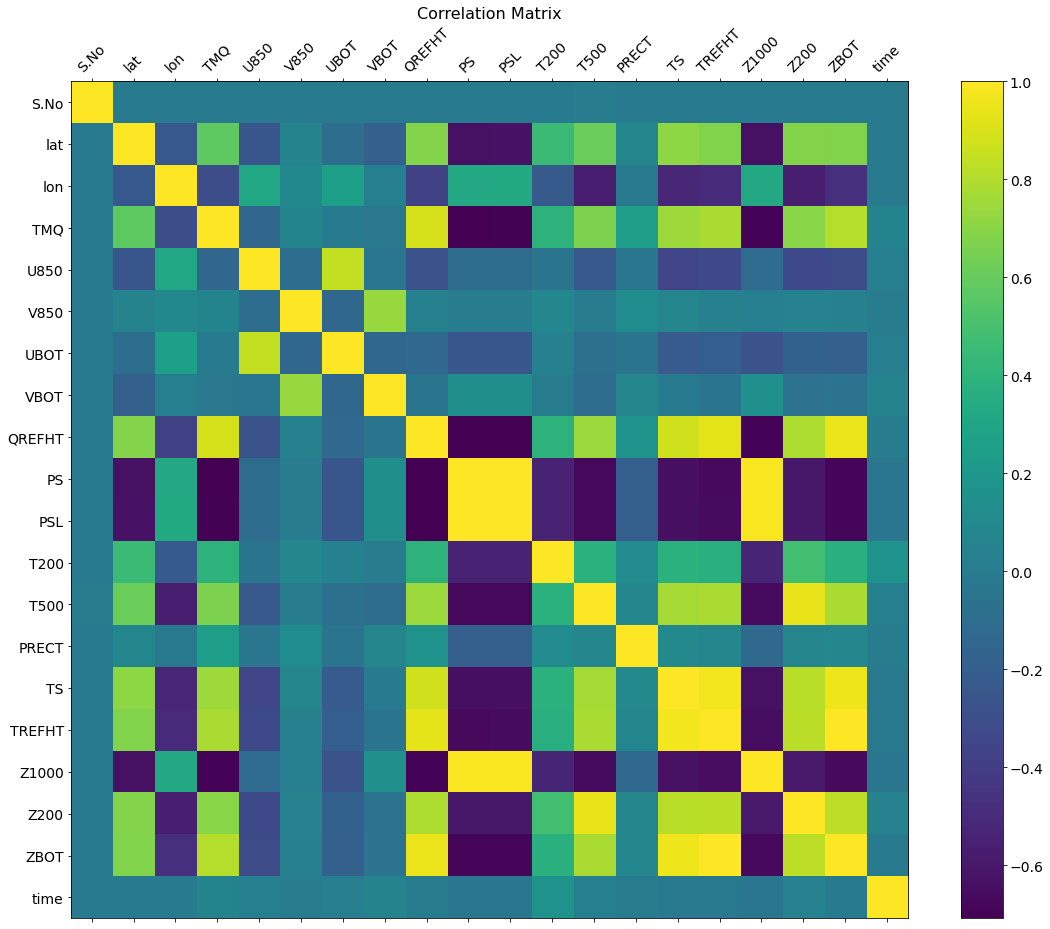

In [6]:
# Checking correlations between features.
df_for_corr = data_df.iloc[:, :-1]

f = plt.figure(figsize=(19, 15))
plt.matshow(df_for_corr.corr(), fignum=f.number)
plt.xticks(range(df_for_corr.select_dtypes(['number']).shape[1]), df_for_corr.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_for_corr.select_dtypes(['number']).shape[1]), df_for_corr.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Logistic Regression Implementation

#### I utilized on the implementation of Logistic Regression from this repository
https://github.com/bamtak/machine-learning-implemetation-python

In [7]:
# MultiClassLogisticRegression implementation
class MultiClassLogisticRegression:

    def __init__(self, n_iter=1000, threshold=1e-3):
        self.n_iter = n_iter
        self.threshold = threshold

    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=42):
        np.random.seed(rand_seed)
        self.classes = np.unique(y)
        self.class_labels = {c: i for i, c in enumerate(self.classes)}

        X = self.add_bias(X)
        y = self.one_hot(y)

        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes), X.shape[1]))
        self._fit_data(X, y, batch_size, lr)
        return self

    def _fit_data(self, X, y, batch_size, lr):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            current_loss = self.cross_entropy(y, self._predict(X))
            self.loss.append(current_loss)

            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]

            error = y_batch - self._predict(X_batch)

            update = (lr * np.dot(error.T, X_batch))

            self.weights += update

            if np.abs(update).max() < self.threshold:
                break

            i += 1

    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

    def predict(self, X):
        return self._predict(self.add_bias(X))

    def _predict(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1, len(self.classes))
        return self.softmax(pre_vals)

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1, 1)

    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))

# Traing and Validating a Model

In [8]:
lr = MultiClassLogisticRegression(threshold=1e-5, n_iter=10000)
lr.fit(train_X, train_y[:, np.newaxis], lr=0.0001)
y_pred = lr.predict_classes(val_X)

In [9]:
val_accuracy = lr.score(val_X, val_y)
val_balanced_accuracy = balanced_accuracy_score(y_pred, val_y)
print('val_accuracy:', val_accuracy)
print('val_balanced_accuracy:', val_balanced_accuracy)
print('confusion_matrix\n', confusion_matrix(val_y, y_pred))

val_accuracy: 0.8204564489112228
val_balanced_accuracy: 0.7611363234813289
confusion_matrix
 [[7290   22  237]
 [ 282  108    0]
 [1169    5  439]]


<AxesSubplot:>

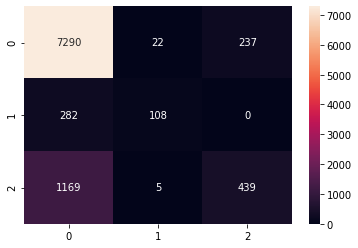

In [10]:
conf_matrix = confusion_matrix(val_y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")

# Testing phase and writing results in file


In [11]:
test_data = pd.read_csv('../data/test.csv')
test_data = test_data.values
test_data = (test_data - mu)/sigma

test_predicts = lr.predict_classes(test_data)
df = pd.DataFrame(test_predicts.astype(int), columns=['LABELS'])
df.insert(0, 'S.No', np.array([i for i in range(len(test_data))]))
df.to_csv('../predictions/logistic_regression.csv', index=False)

### Loss curve

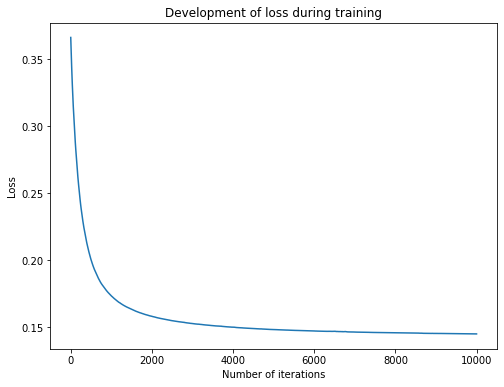

In [12]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# Testing other models

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifiers = [
    ('naive bayes gaussian kernel', GaussianNB()),
    ('random forests', RandomForestClassifier()),
    ('svm linear', SVC(kernel='linear'))
]

In [14]:
for model_name, model_instance in classifiers:
    classifier = model_instance
    classifier.fit(train_X, train_y)
    val_acccuracy = classifier.score(val_X, val_y)
    y_pred = classifier.predict(val_X)
    val_balanced_accuracy = balanced_accuracy_score(y_pred, val_y)
    print(model_name)
    print('val_acccuracy:', val_acccuracy)
    print('val_balanced_accuracy:', val_balanced_accuracy)
    print('confusion_matrix\n', confusion_matrix(val_y, y_pred))
    print()

naive bayes gaussian kernel
val_acccuracy: 0.5767378559463987
val_balanced_accuracy: 0.4805325848139643
confusion_matrix
 [[4040 1604 1905]
 [  12  376    2]
 [ 483   37 1093]]

random forests
val_acccuracy: 0.8534338358458962
val_balanced_accuracy: 0.736357003787525
confusion_matrix
 [[6854  114  581]
 [ 125  250   15]
 [ 551   14 1048]]

svm linear
val_acccuracy: 0.8097780569514238
val_balanced_accuracy: 0.7389567562258496
confusion_matrix
 [[7424   46   79]
 [ 279  111    0]
 [1408    5  200]]

